<a href="https://colab.research.google.com/github/hlberghout/CHEM4420/blob/dev/10_93_PiB_Average_Position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrate the PiB expression for the average position of the particle with n = 10 and explain the result.**

10.93 - Numerically integrate the expression for the average value of position for $\Psi_{10}$ for a particle-in-a-box and explain the answer.
---



This is a text block than can be used to explain sections of code in the program or even write a complete report.  Comments within the code block can also be used as demonstrated below.  The first code block of this notebook is a library declaration block defining the libraries the contain the functions that we will use and the notebook scrip that follows and how those functions are called.

In [1]:
#note that any input following a pound symbol is a comment and is ignored by the intepreter.
#import math #Basic math library for Python
#import cmath #Complex math library for Python
import matplotlib #Matplotlib is a python plotting library used in this example.
import matplotlib.pyplot as plt #pyplot provides a matlab like plotting function.
import numpy as np #NumPy is the fundamental scientific computing package in Python.
#import pandas as pd #pandas data analysis library.
import scipy.constants as constants #SciPy physical constants library, SI units.
import scipy.integrate as integrate #SciPy Integration library
from scipy.integrate import quad
import scipy.optimize as optimize
import scipy.special as special #SciPy special functions library
import seaborn #matplotlib enhancement.
from IPython.display import Latex #library to allow creation of pretty formulas written in LATEX

This block defines the initial values of variable that are not defined elsewhere in the imported libraries above.

In [2]:
# Defined variables
L = 1.0 #length of the box, also the right side limit of the box with the left side at x=0.0.
pts = 101 #number of points to plot between 0 and a, including a
x = np.linspace(0, L, pts) #x range variable between 0 and L
n = int(10) #value of n quantum number

The average position of the particle in a one-dimensional box of length $L$ is given by the expection value of $x$:

$$ \langle x \rangle = \int_0^L \psi_n^* \hat x \psi_n \, \text d x ,$$


$$ \text{where} \; \psi_n (x)=\sqrt{\frac {2} {L}} \sin \left( \frac {n \pi x} {L} \right), \text{ where } n \text{ is a positive integer.} $$

Explicit substitution yeilds our working equation:

$$ \langle x \rangle = {\frac {2} {L}}\int_0^L \hat x  \sin^2 \left( \frac {n \pi x} {L} \right) \, \text d x .$$


In [3]:
#Define the integrand for evaluating the average position of a PiB.
def integrand(x, L, n):
    return (2/L)*x*(np.sin(n*constants.pi*x/L))**2

In [16]:
from scipy.integrate import quad

ave_x = quad(integrand, 0.0, L, args=(L, n))
print("{:20} {:6.3e} {:^3} {:6.3e}".format("Average Position:", ave_x[0], "±", ave_x[1])) 

Average Position:    5.000e-01  ±  5.492e-15


This block of code produces the plot of the integrand of the PiB position expectation value.

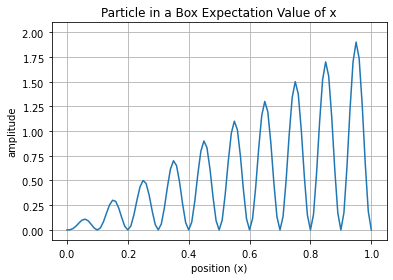

In [19]:
#Plot PIB wave functions and squares.
fig = plt.figure()
ax = plt.axes()
ax.plot(x,integrand(x, L, n))
ax.set(xlabel='position (x)', ylabel='amplitude',
       title="Particle in a Box Expectation Value of x")
ax.grid()
plt.ylim(-.1,2.1)
plt.ticklabel_format(style='sci', axis='both',scilimits=(-3,4), useMathText='True')
plt.show()